# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-02 13:43:09.566505: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 13:43:09.569396: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 13:43:09.600833: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 13:43:10.309697: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia


🌄 Graia v0.0.1

Graia initializing…
Graia ready.



In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 1
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=16, layers=2, outputs=10, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

(16, 784)  ->  (1, 16, 16)  ->  (10, 16)
Graia model with 12960 random parameters instantiated.


In [6]:
model.fit(train_images, train_labels, epochs=1)
# plt.imshow(model.hidden_weights[0])
# print("\n", model.input_weights[0][:16])
print("\n", model.hidden_weights[0])
# print("\n", model.output_weights)


Epoch 1/3: accuracy 0.000%
Epoch 2/3: accuracy 0.000%
Epoch 3/3: accuracy 0.000%

 [[ 25  -2  25  -8  22  22   8 -25  -8  23   2 -25 -21 -23 -22  21]
 [ 22  -2  21  24   8 -22   8 -22 -25 -22 -22 -21  24 -23  -2 -21]
 [ 22 -21 -22 -24  25 -22   8  -8  -2   8 -21  21 -21 -24  21  21]
 [-22   2  24  22 -23 -21  23   2 -24  -8 -25 -25  21   2  -2  24]
 [ -8 -21 -22  -8  23   8 -22  -2  -8  -8  -8  25  24 -22   8  -8]
 [-25  23  21 -24   8   8   2 -23   2  24 -23 -21 -25 -24 -21 -21]
 [  8  21 -23  -8 -24  -2  24  23  -8  22 -22  21  22  24  21 -24]
 [-21  23   8  -8 -24  24  -2 -24   2  25  -8 -23  24  25   8 -24]
 [-22  -2  -2   8 -25   8  -8  -2  -8   2   8 -22  24   2 -25  -8]
 [-23 -24 -23  25  23   8  25  -2  22   2   8  -8  -8 -22 -25  23]
 [ -8 -23  22 -24 -25   8  21  25 -24   8 -21  -2  22   8  24  24]
 [-23  24  23 -25  22 -25   8   8 -21 -22 -23 -23 -21 -21 -25 -21]
 [  8  -8   8 -23  25   2  -8  -2  -8   8 -22  24 -22   8 -24  -8]
 [ 21  -2   8   8  23   8 -21   8 -24   8   2 

[  0 255 128 192   0   0 255 255   0   0]


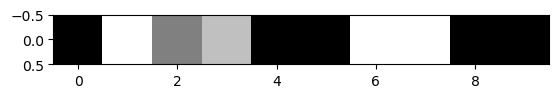

In [7]:
print(model.last_outputs)
plt.imshow([model.last_outputs], cmap="gray")